In [19]:
import numpy as np

In [20]:
# First steepest descent algorithm implementation

def steepest(A, b, x, eps, maxiter):
    AT = np.transpose(A)
    A = np.matmul(AT, A)
    b = np.matmul(AT, b)
    i = 1
    r = b - np.matmul(A, x)
    delta = np.dot(r, r)
    conv = [delta]
    while (np.sqrt(delta) > eps):
        q = np.matmul(A, r)
        alpha = delta / np.dot(q, r)
        x = x + alpha * r
        if (i % 50 == 0):
            r = b - np.matmul(A, x)
        else:
            r = r - alpha * q
        delta = np.dot(r, r)
        conv.append(delta)
        i += 1
    return x, conv + [i]

    

In [21]:
A = np.array([[100, 3, -2], [1, 200, 5], [-4, 3, 100]])
b = np.array([800, 1000, 500])
x0 = np.array([0, 0, 0])

print(steepest(A, b, x0, 0.0001, 1000)[0])

[7.95854215 4.8308719  5.17341553]


In [22]:
np.linalg.solve(A, b)

array([7.95854215, 4.8308719 , 5.17341553])

In [23]:
# Second steepest descent algorithm implementation

def steepest1(A, b, eps):
    x = np.array([0 for _ in range(len(b))])
    AT = np.transpose(A)
    A = np.matmul(AT, A)
    b = np.matmul(AT, b)
    r = b - np.matmul(A, x)
    
    while (np.sqrt(np.dot(r, r)) > eps):
        alpha = np.dot(r, r) / np.dot(np.matmul(A, r), r)
        x = x + alpha * r
        r = b - np.matmul(A, x)
        
        
    return x

In [24]:
steepest1(A, b, 0.001)

array([7.9585421 , 4.83087191, 5.17341547])

[53.99999983 93.99999953 89.00000025 87.00000031 25.99999945 37.99999952
 81.99999969 70.00000003 22.99999976 87.00000052  8.00000041  5.99999974
 57.00000014 19.99999994 98.00000014 78.00000001 77.00000008  9.00000014
 34.99999995 73.00000035 99.00000017 87.99999924 73.00000001  0.9999998
 48.00000052 52.99999948 16.00000008 98.99999981 30.00000035 44.0000002
 41.99999973 29.00000111 86.99999991 23.0000004  41.         60.
 59.00000002 20.99999969 72.99999977 79.0000007  89.99999989 82.99999999
 79.99999998 73.00000056 48.00000028 46.99999953 13.99999955  7.99999994
 95.99999948 69.99999984]
[54. 94. 89. 87. 26. 38. 82. 70. 23. 87.  8.  6. 57. 20. 98. 78. 77.  9.
 35. 73. 99. 88. 73.  1. 48. 53. 16. 99. 30. 44. 42. 29. 87. 23. 41. 60.
 59. 21. 73. 79. 90. 83. 80. 73. 48. 47. 14.  8. 96. 70.]
[54, 94, 89, 87, 26, 38, 82, 70, 23, 87, 8, 6, 57, 20, 98, 78, 77, 9, 35, 73, 99, 88, 73, 1, 48, 53, 16, 99, 30, 44, 42, 29, 87, 23, 41, 60, 59, 21, 73, 79, 90, 83, 80, 73, 48, 47, 14, 8, 96, 70]


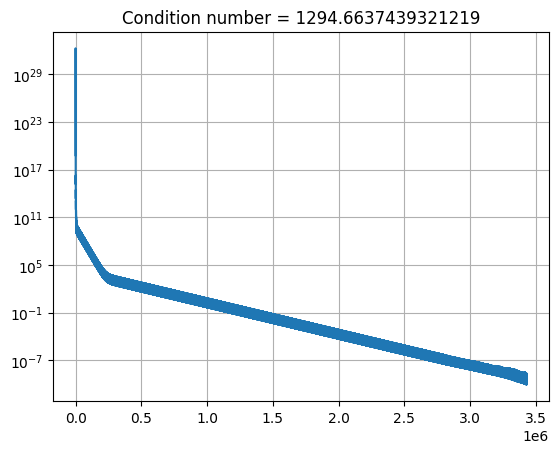

In [37]:
from random import randint
import matplotlib.pyplot as plt

n = 50
A = [[randint(1, 100) for k in range(n)] for i in range(n)]
X = [randint(1, 100) for i in range(n)]
f = np.matmul(A, X)
x0 = [0 for _ in range(n)]

solution = steepest(A, f, x0, 0.00001, 1000)
plt.plot([i + 1 for i in range(solution[1][-1])], solution[1][:-1])
plt.title(f'Condition number = {np.linalg.cond(A)}')
plt.grid()
plt.yscale('log')
print(steepest(A, f, x0, 0.00001, 1000)[0])
print(np.linalg.solve(A, f))
print(X)
print("Initial condition number: ", np.linalg.cond(A))

New condition number:  20989.664808556223


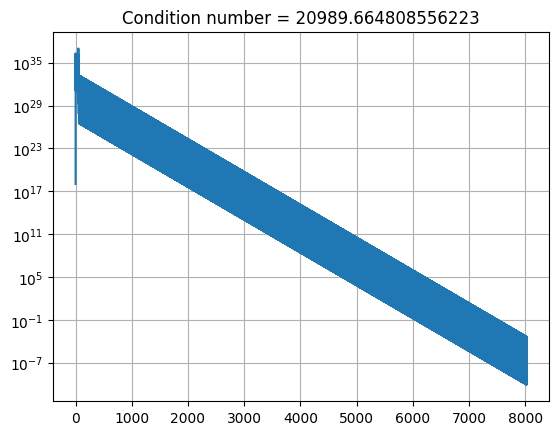

In [30]:
A[0][0] += 100000
A[-1][-1] = 1
print("New condition number: ", np.linalg.cond(A))
solution = steepest(A, f, x0, 0.00001, 1000)
if (np.linalg.cond(A) > 1000):
    plt.plot([i + 1 for i in range(solution[1][-1])], solution[1][:-1])
    plt.title(f'Condition number = {np.linalg.cond(A)}')
    plt.grid()
    plt.yscale('log')

In [36]:
n = 300
A = [[randint(1, 100) for k in range(n)] for i in range(n)]
X = [randint(1, 100) for i in range(n)]
f = np.matmul(A, X)
x0 = [0 for _ in range(n)]

solution = steepest(A, f, x0, 0.00001, 1000)
plt.plot([i + 1 for i in range(solution[1][-1])], solution[1][:-1])
plt.title(f'Condition number = {np.linalg.cond(A)}')
plt.grid()
plt.yscale('log')
print(steepest(A, f, x0, 0.00001, 1000)[0])
print(np.linalg.solve(A, f))
print(X)
print("Initial condition number: ", np.linalg.cond(A))

KeyboardInterrupt: 